In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import seaborn as sb

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/kyphosis.csv')

In [ ]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


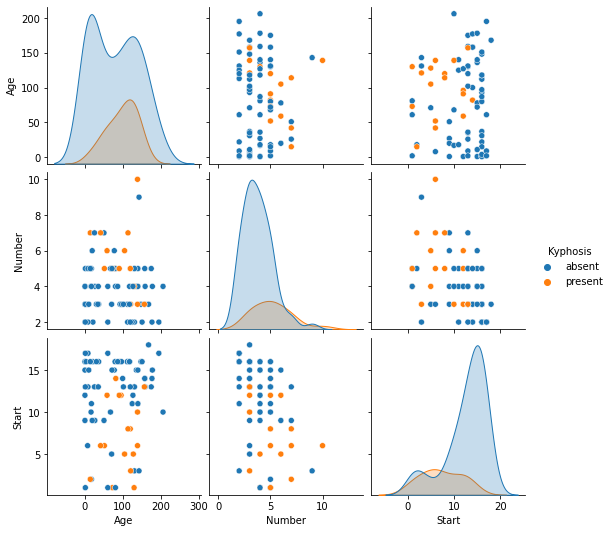

In [ ]:
sb.pairplot(df, hue='Kyphosis')

In [ ]:
## Divisao Treino e Teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [ ]:
x.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [ ]:
y.head()

0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object

In [ ]:
x_Treino, x_Teste, y_Treino, y_Teste = train_test_split(x, y, test_size=0.3)

In [ ]:
## Criando a Arvore de Decisao

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
ArvoreDecisao=DecisionTreeClassifier()

In [ ]:
ArvoreDecisao.fit(x_Treino, y_Treino)

DecisionTreeClassifier()

In [ ]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [ ]:
predicao = ArvoreDecisao.predict(x_Teste)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_Teste, predicao))

[[20  1]
 [ 2  2]]


In [ ]:
print(confusion_matrix(y_Teste, predicao))

[[20  1]
 [ 2  2]]


In [ ]:
## Visualizando a arvore

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

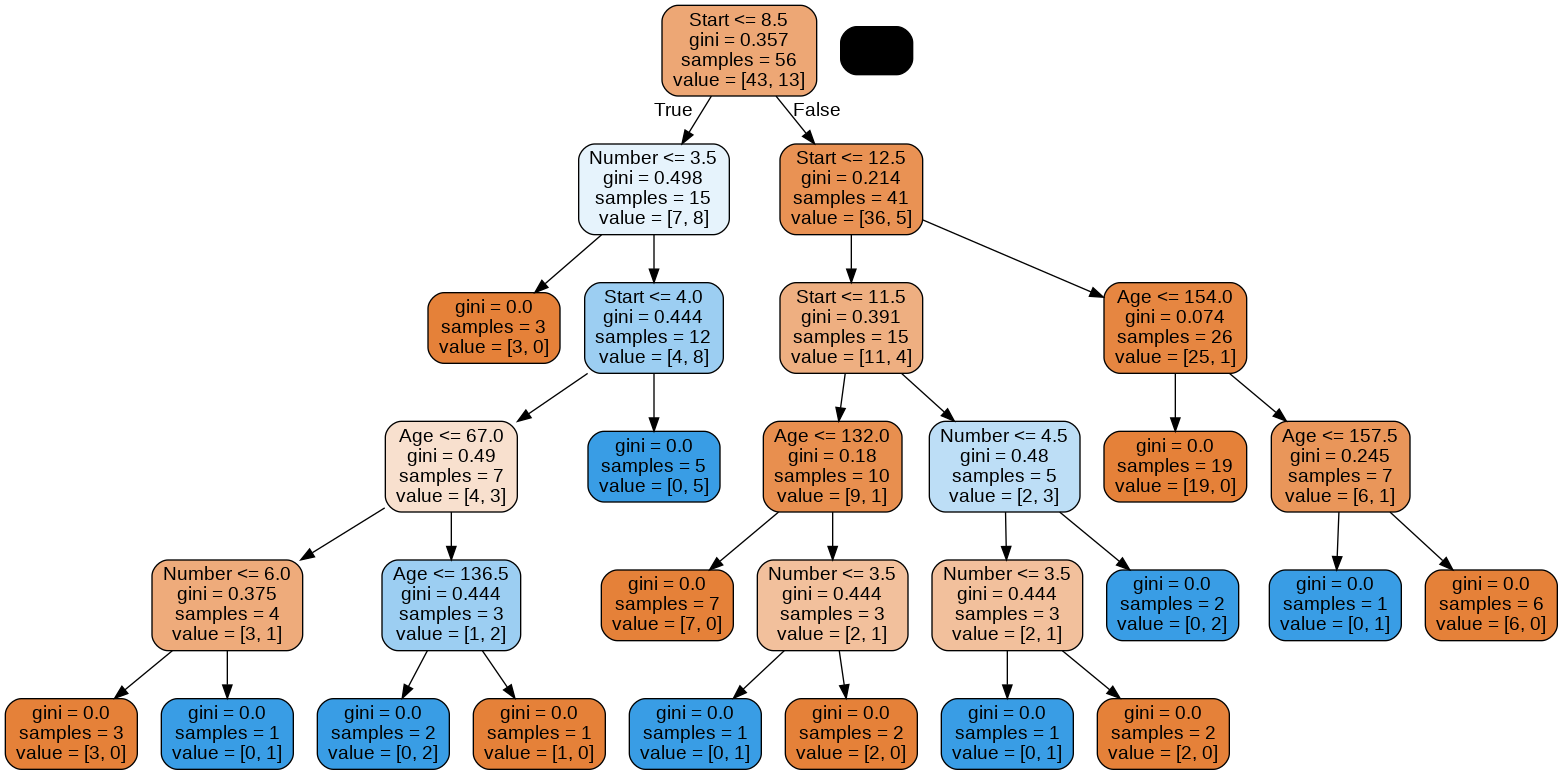

In [ ]:
dot_data = StringIO()
export_graphviz(ArvoreDecisao, out_file=dot_data, feature_names= features, filled=True, rounded = True)
graph= pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
##Floresta Aleatoria

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
FlorestaAleatoria = RandomForestClassifier(n_estimators=50)

In [ ]:
FlorestaAleatoria.fit(x_Treino, y_Treino)

RandomForestClassifier(n_estimators=50)

In [ ]:
predicao=FlorestaAleatoria.predict(x_Teste)

In [ ]:
print(confusion_matrix(y_Teste, predicao))

[[21  0]
 [ 3  1]]


In [ ]:
print(classification_report(y_Teste, predicao))

              precision    recall  f1-score   support

      absent       0.88      1.00      0.93        21
     present       1.00      0.25      0.40         4

    accuracy                           0.88        25
   macro avg       0.94      0.62      0.67        25
weighted avg       0.90      0.88      0.85        25

